In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../car_price_linear_regression/car_price.csv')

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Cleaning to make data consistent

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [7]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory data analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<AxesSubplot:xlabel='msrp', ylabel='Count'>

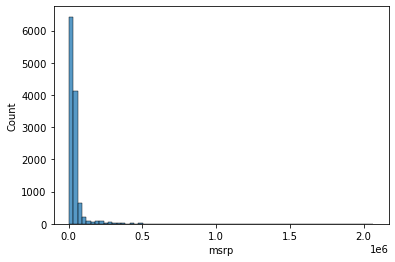

In [10]:
sns.histplot(df.msrp, bins=70)
# tail to the right which means data isn't normally distributed.
# Most cars are cheap, but there're some of them with high price
# to the right.
# + you can see that we have graph till 2.0 =>
# means there is at least one car with 2 million price

<AxesSubplot:xlabel='msrp', ylabel='Count'>

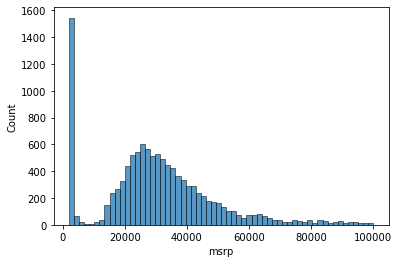

In [11]:
sns.histplot(df.msrp[df.msrp < 100000], bins=60)

In [12]:
# get rid of tail by applying log() which will diminish the large
# value.

np.log([1, 5, 20, 100, 1000])

array([0.        , 1.60943791, 2.99573227, 4.60517019, 6.90775528])

In [13]:
# But we can't apply log() to 0. => add 1 to every value
np.log([0 + 1, 1 + 1, 5 + 1, 20 + 1, 100 + 1, 1000 + 1])

array([0.        , 0.69314718, 1.79175947, 3.04452244, 4.61512052,
       6.90875478])

In [14]:
# log1p encompasses +1 action
np.log1p([0, 5, 10, 100, 5000])

array([0.        , 1.79175947, 2.39789527, 4.61512052, 8.51739317])

In [15]:
prices = np.log1p(df.msrp)
prices

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

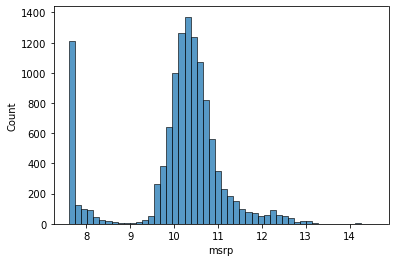

In [16]:
sns.histplot(prices, bins=50)
# all large figures are collapsed and all small figures
# are roughly the same.
# Bell-curve shape (normal distribution)

In [17]:
# look at missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up a validation framework

In [18]:
# 3 parts: train 60%, validation 20%, test 20%
len(df) * 0.2
# => use int() to round the number

2382.8

In [19]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [20]:
n, n_val + n_test + n_train
# data isn't the same due to rounding.

(11914, 11912)

In [21]:
# That's why take first, second and the REST is for training
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [22]:
# everything is good now
n, n_val + n_test + n_train

(11914, 11914)

In [23]:
df.iloc[1:4, :]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450


In [24]:
df_valid = df.iloc[:n_val]
df_test = df.iloc[n_val:n_test + n_val]
df_train = df.iloc[n_test + n_val:]

In [25]:
np.random.seed(2)

length = np.arange(n)
np.random.shuffle(length)
df_shuffle = df.iloc[length]

In [26]:
df_train = df_shuffle.iloc[:n_train].copy()
df_valid = df_shuffle.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffle.iloc[n_train + n_val:].copy()

In [27]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685


In [28]:
len(df_train), len(df_valid), len(df_test)

(7150, 2382, 2382)

In [29]:
# But if we want to have index of SHUFFLED data from 0 to n
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
df_valid.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650


In [31]:
y_train = np.log1p(df_train.msrp.values)
y_valid = np.log1p(df_valid.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']

# Linear regression

In [33]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [34]:
# makeshift feature matrix
xi = [453, 11, 86] # where i = 10
# engine_hp; city_mpg; popularity

In [35]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
# w0 if we don't know anything about the car.

# every engine_hp adds 0.01 to the price.
# If we have 453 hp => 453 * 0.01 => 4.53

In [36]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for i in range(n):
        pred += w[i] * xi[i]
    
    return np.expm1(pred)

In [37]:
linear_regression(xi)

222347.2221101062

In [38]:
def linear_regression(xi):
    return np.expm1(w0 + dot(xi, w))

def dot(xi, w):
    n = len(xi)
    
    result = 0
    for j in range(n):
        result += xi[j] * w[j]
    
    return result

In [39]:
linear_regression(xi)

222347.22211010658

In [40]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [41]:
def linear_regression(xi):
    new_xi = [1] + xi
    return np.expm1(dot(new_xi, w_new))

def dot(xi, w):
    n = len(xi)
    
    result = 0
    for j in range(n):
        result += xi[j] * w[j]
    
    return result

In [42]:
linear_regression(xi)

222347.2221101062

In [43]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = np.array([x1, x2, x3])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [44]:
def linear_regression(X):
    return X.dot(w_new)

In [45]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [46]:
def train_linear_regression(X, y):
    pass

In [53]:
x1 = [148, 24, 1385]
x2 = [132, 25, 2031]
x3 = [453, 11, 86]
x4 = [158, 24, 185]
x5 = [172, 25, 201]
x6 = [413, 11, 86]
x7 = [38, 54, 185]
x8 = [142, 25, 431]
x9 = [453, 31, 86]

X = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9])
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [54]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
X = np.column_stack([ones, X])

In [56]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [57]:
XTX = X.T.dot(X)

In [58]:
XTX_inv = np.linalg.inv(XTX)

In [59]:
w_full = XTX_inv.dot(X.T).dot(y)

In [60]:
w0 = w_full[0]
w = w_full[1:]

In [61]:
w0, w

(30006.77669255554, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

<h3>Negative in w means with every extra something (i.e. age) price decreases</h3>

In [62]:
x1 = [148, 24, 1385]
x2 = [132, 25, 2031]
x3 = [453, 11, 86]
x4 = [158, 24, 185]
x5 = [172, 25, 201]
x6 = [413, 11, 86]
x7 = [38, 54, 185]
x8 = [142, 25, 431]
x9 = [453, 31, 86]

X = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9])

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [64]:
train_linear_regression(X, y)

(30006.77669255554, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

# Car price baseline model

In [65]:
df_train.dtypes
# although year & number_of_doors are numerical by type
# they're categorical by meaning

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [66]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].values

In [67]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [68]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [69]:
X_train = df_train[base].fillna(0).values

In [70]:
w0, w = train_linear_regression(X_train, y_train)

In [71]:
w0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [72]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

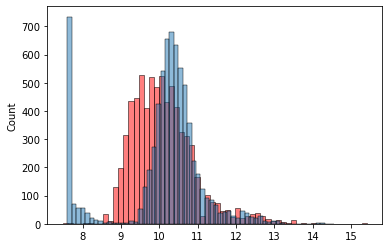

In [73]:
sns.histplot(y_pred, color='red', bins=60, alpha=0.5)
sns.histplot(y_train, bins=60, alpha=0.5)

# RMSE

In [74]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the model

In [76]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [77]:
def prepare_X(df):
    df_num = df[base]
    X = df_num.fillna(0).values
    
    return X

In [78]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

In [79]:
X_valid = prepare_X(df_valid)

y_pred = w0 + X_valid.dot(w)

In [80]:
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [81]:
rmse(y_valid, y_pred)

0.761653099130156

# Some feature engineering

In [82]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [83]:
# but we don't want to change the data => use .copy()

def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w0 + X_valid.dot(w)

rmse(y_valid, y_pred)

0.5172055461058299

<AxesSubplot:ylabel='Count'>

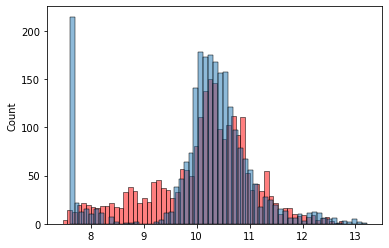

In [85]:
sns.histplot(y_pred, color='red', bins=60, alpha=0.5)
sns.histplot(y_valid, bins=60, alpha=0.5)

# Categorical variables

In [86]:
list(df.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [87]:
categories = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [88]:
result = {}

for c in categories:
    result[c] = list(df[c].value_counts().head().index)

In [89]:
result

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [90]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for key, value in result.items():
        for v in value:
            df[f"{key}_%s" % v] = (df[key] == v).astype(int)
            features.append(f"{key}_%s" % v)
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [91]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w0 + X_valid.dot(w)

rmse(y_valid, y_pred)

247.70115607042655

In [92]:
int(w0)

-19101839859957044

In [93]:
w

array([-8.46147308e-01, -1.17046837e+02, -2.39727020e+01, -2.57398286e+01,
       -1.07087692e-02, -1.48467123e+01, -1.36930056e+04, -1.38450988e+04,
       -1.37113034e+04,  2.99846059e+01,  3.34003811e+01, -1.22570653e+02,
        8.00036101e+01,  2.17150212e+01,  3.93719936e+01, -3.07513081e+01,
        1.18978454e+02,  8.24342227e+01, -7.99880386e+01, -1.41933150e+03,
       -1.30623883e+03, -1.39911307e+03, -1.48922014e+03, -1.24226664e+03,
        2.38806386e+16,  2.38806386e+16,  2.38806386e+16,  2.38806386e+16,
        2.38806386e+16, -4.77879870e+15, -4.77879870e+15, -4.77879870e+15,
       -4.77879870e+15,  2.04120630e+00, -7.44607149e+00,  7.41700137e+00,
        1.56997438e+01, -8.32138432e+00,  3.16834520e+02,  3.47125248e+02,
        3.47538268e+02, -8.44316325e-02,  6.13911333e-03,  1.76928471e-01,
        3.74550688e-01, -1.96367745e-01])

# Regularization

In [94]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [95]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [96]:
# take ones and multiply by some number to control regularization
XTX = XTX  + 0.01 * np.eye(XTX.shape[0])

In [97]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [98]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for key, value in result.items():
        for v in value:
            df[f"{key}_%s" % v] = (df[key] == v).astype(int)
            features.append(f"{key}_%s" % v)
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [99]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w0 + X_valid.dot(w)

rmse(y_valid, y_pred)

0.45145276834075343

# Parameter tuning

In [102]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_valid = prepare_X(df_valid)
    y_pred = w0 + X_valid.dot(w)

    print(rmse(y_valid, y_pred), w0, r)

247.70115607042655 -1.9101839859957044e+16 0.0
0.45145226387887744 8.89540066175813 1e-05
0.4514523088072325 6.2653209929851705 0.0001
0.45145276834075343 6.289068892623029 0.001
0.451457394373226 6.2791513842446225 0.01
0.45150592592475547 6.193822486619297 0.1
0.4521599847170131 5.637951752859923 1.0
0.4652194932221747 4.288463855188162 10


In [105]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_valid = prepare_X(df_valid)
y_pred = w0 + X_valid.dot(w)

print(rmse(y_valid, y_pred), w0, r)

0.45145276834075343 6.289068892623029 0.001


# Using the model

In [106]:
full_train = pd.concat([df_train, df_valid])

In [107]:
full_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640


In [108]:
full_train = full_train.reset_index(drop=True)

In [109]:
full_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031


In [110]:
X_full_train = prepare_X(full_train)

In [111]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [113]:
# same as `concat` in Pandas but for numpy arrays
y_full_train = np.concatenate([y_train, y_valid])

In [121]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_result = w0 + X_test.dot(w)
rmse_result = rmse(y_test, y_result)

In [122]:
rmse_result

0.4474304394049352

In [125]:
# we take from df_test as we don't use this data for training
car = df_test.iloc[20].to_dict()

In [127]:
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)

In [131]:
y_pred = np.expm1(w0 + X_small.dot(w))
y_pred[0]

40754.68302932439